# Creating behavior reports
will create a summary of a behavior session.

In [27]:
import json
from os.path import join
from src import behavior_class as bc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
mouse_id = "140503_2"

In [3]:
behavior = bc.behaviorData(mouse_id)
behavior_folders = [
    (index, folder) for index, folder in enumerate(behavior.find_behavior_folders())
]
behavior_folders

Searching for behavior folders in /data2/gergely/invivo_DATA/sleep/140503_2
Searching for behavior folders in /data2/gergely/invivo_DATA/sleep/140503_2


[(0,
  '/data2/gergely/invivo_DATA/sleep/140503_2/1_16/TSeries-01162024-0853_dendrite-001/TSeries-01162024-0853_dendrite-001.sima/behavior'),
 (1,
  '/data2/gergely/invivo_DATA/sleep/140503_2/1_18/TSeries-01182024-0805-001/TSeries-01182024-0805-001.sima/behavior'),
 (2,
  '/data2/gergely/invivo_DATA/sleep/140503_2/1_17/TSeries-01172024-0745_dendrites-001/TSeries-01172024-0745_dendrites-001.sima/behavior')]

In [4]:
beh_folder = behavior_folders[0][1]
processed_json = "140503_2_20240116123502_927_sleep.json"

In [5]:
with open(join(beh_folder, processed_json)) as f:
    beh_data = json.load(f)
beh_data[0]["data"].keys()

dict_keys(['position_y', 'reward', 'lap', 'trackLength', 'recordingDuration', 'treadmillPosition', 'licking', 'water', 'velocity', 'lap_bin', 'sampling_interval', 'discard_pre', 'discard_post'])

## Summary data

In [6]:
summary_dict = {
    "recording_duration": beh_data[0]["data"]["recordingDuration"],
    "number_laps": max(beh_data[0]["data"]["lap_bin"]),
    "recordings_duration": beh_data[0]["data"]["recordingDuration"],
    "mean_velocity": np.mean(beh_data[0]["data"]["velocity"])
    / beh_data[0]["data"]["recordingDuration"],
}
with open(join(beh_folder, "behavior_summary.json"), "w") as f:
    json.dump(summary_dict, f, indent=4)

## Summary plots

In [29]:
filtered_velocity = pd.read_csv(join(beh_folder, "filtered_velo.csv"))
mob_immob = pd.read_csv(join(beh_folder, "mobility_immobility.csv"))

In [37]:
mob_immob

,False
0,False
1,False
2,False
3,False
4,False
...,...
35994,False
35995,False
35996,False
35997,False


ValueError: x and y must have same first dimension, but have shapes (36000,) and (35999, 1)

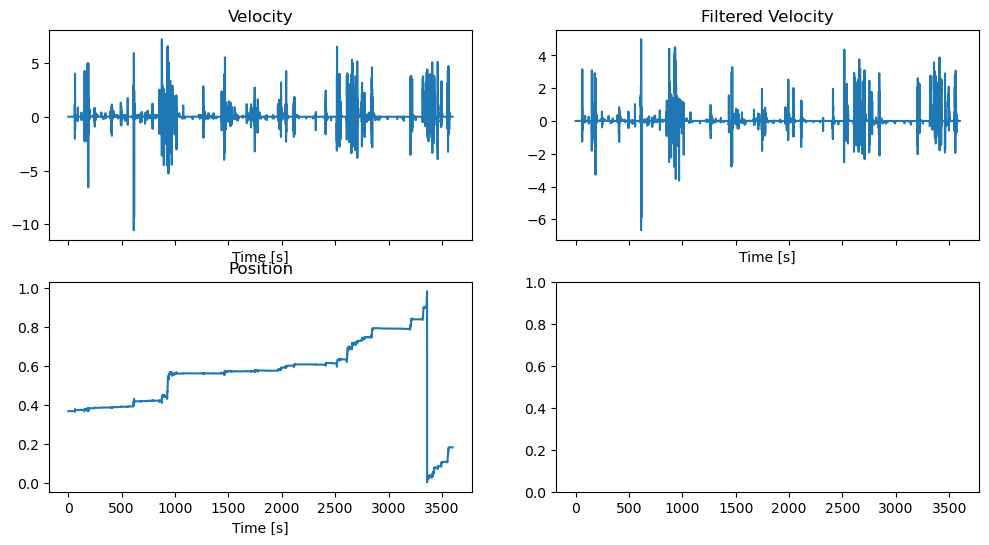

In [35]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), sharex=True)
duration = int(beh_data[0]["data"]["recordingDuration"])
num_data_points = len(beh_data[0]["data"]["velocity"])
x = np.linspace(0, duration, num_data_points)

# Velocity
ax[0, 0].plot(x, np.array(beh_data[0]["data"]["velocity"]))
ax[0, 0].set_title("Velocity")
ax[0, 0].set_xlabel("Time [s]")

# position
ax[1, 0].plot(x, np.array(beh_data[0]["data"]["treadmillPosition"]))
ax[1, 0].set_title("Position")
ax[1, 0].set_xlabel("Time [s]")

# filtered velocity
ax[0, 1].plot(x, np.array(filtered_velocity["filtered velo"]))
ax[0, 1].set_title("Filtered Velocity")
ax[0, 1].set_xlabel("Time [s]")

# mobility immobility
ax[1, 1].plot(x, mob_immob)
ax[1, 1].set_title("Mobility Immobility")
ax[1, 1].set_xlabel("Time [s]")

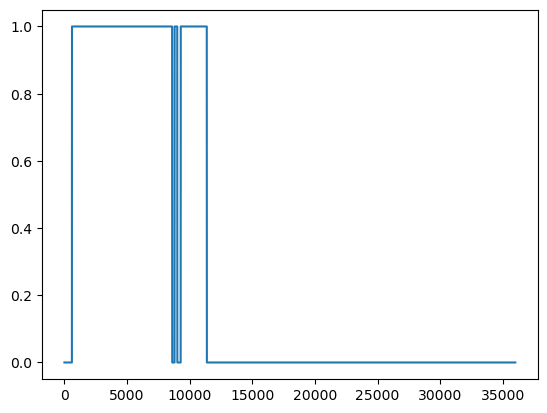

In [26]:
plt.plot(beh_data[0]["data"]["position_y"])